In [ ]:
!pip install statsmodels



You should consider upgrading via the 'C:\Users\shera\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
df = pd.read_csv('/content/lab.csv')
df.head()

,Time,EB
0,01-01-2019 00:00,0.03
1,01-01-2019 00:05,0.03
2,01-01-2019 00:10,0.02
3,01-01-2019 00:15,0.03
4,01-01-2019 00:20,0.03


In [ ]:
"Time" in df.columns

True

In [ ]:
!pip install matplotlib numpy


You should consider upgrading via the 'C:\Users\shera\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 25, 12

In [ ]:
df['Time'] = pd.to_datetime(df['Time'], errors='coerce', format='mixed')


In [ ]:
df.head()


,Time,EB
0,2019-01-01 00:00:00,0.03
1,2019-01-01 00:05:00,0.03
2,2019-01-01 00:10:00,0.02
3,2019-01-01 00:15:00,0.03
4,2019-01-01 00:20:00,0.03


In [ ]:
newdf = df.groupby(pd.Grouper(key='Time', axis=0, freq='01M')).mean()
print(newdf.head())

In [ ]:
"Time" in newdf.columns

False

In [ ]:
newdf.describe()


,EB
count,13.000000
mean,0.089307
std,0.046595
min,0.049737
25%,0.067624
50%,0.076354
75%,0.088837
max,0.230000


In [ ]:
newdf.head()


,EB
Time,
2019-01-31,0.089534
2019-02-28,0.084510
2019-03-31,0.071170
2019-04-30,0.071582
2019-05-31,0.076354


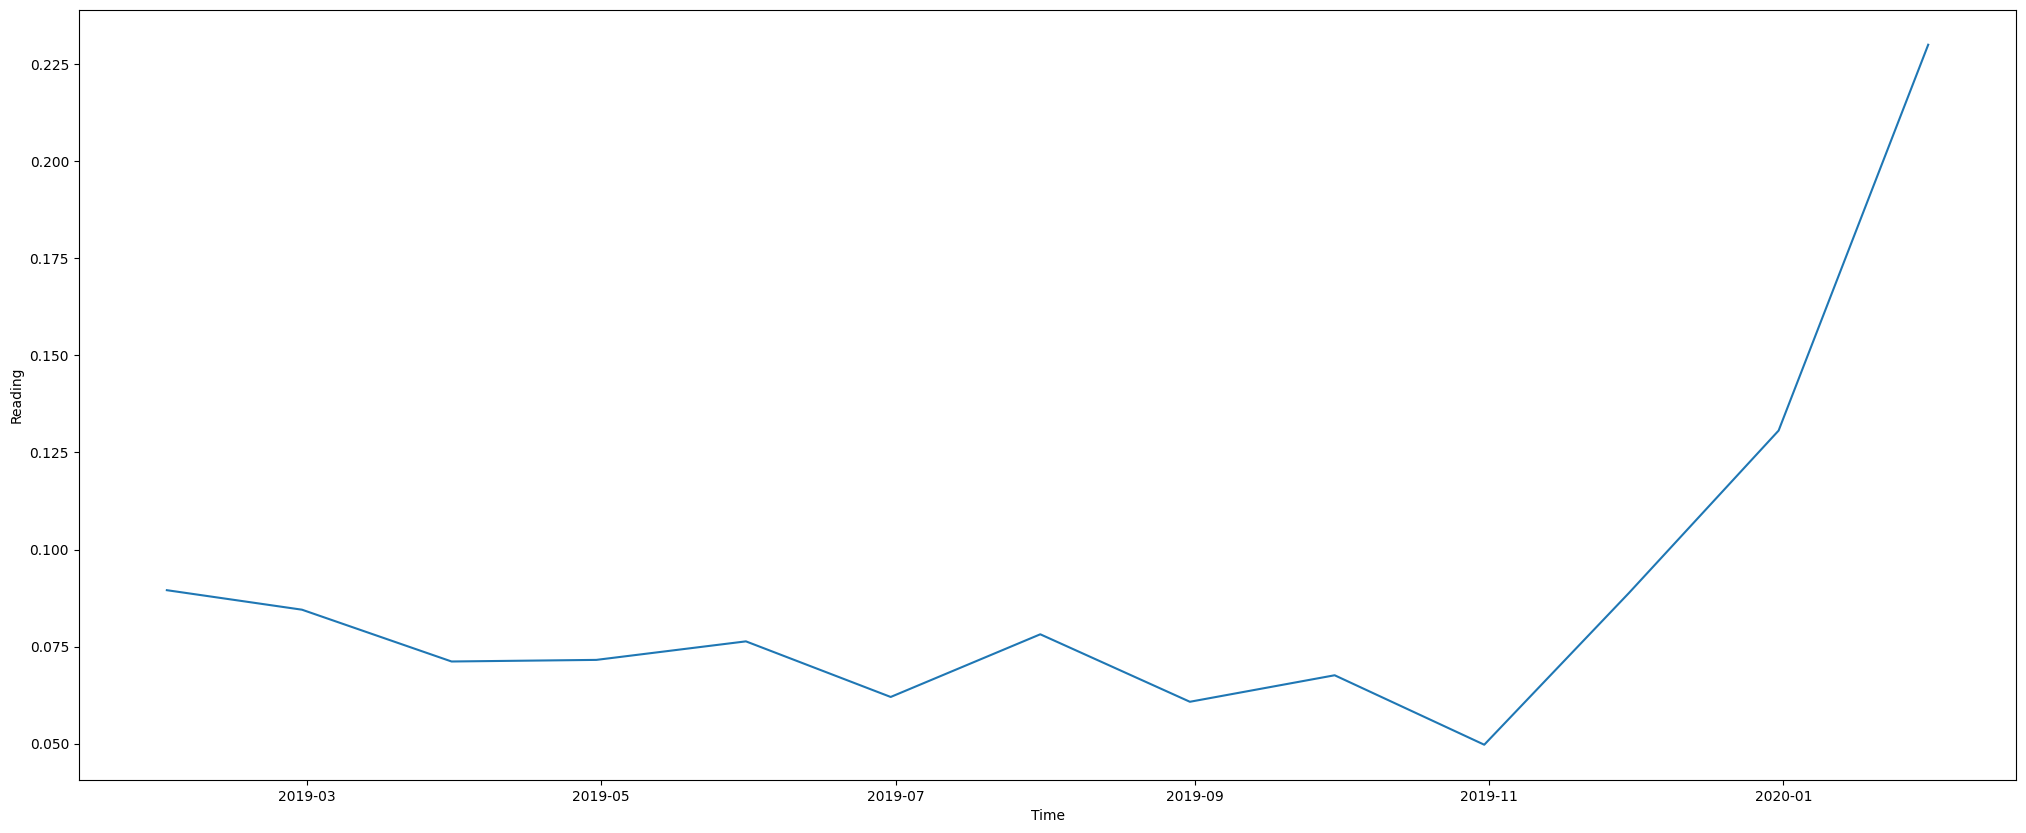

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 25, 10
import matplotlib.pyplot as plt
plt.plot(newdf)
plt.xlabel("Time")
plt.ylabel("Reading")
plt.show()

In [ ]:
cdv = newdf.copy(deep=False)
cdv


,EB
Time,
2019-01-31,0.089534
2019-02-28,0.084510
2019-03-31,0.071170
2019-04-30,0.071582
2019-05-31,0.076354
2019-06-30,0.062036
2019-07-31,0.078176
2019-08-31,0.060798
2019-09-30,0.067624


In [ ]:
backdf=newdf.copy(deep=False)

In [ ]:
cdv['EB'].head()

Time
2019-01-31    0.089534
2019-02-28    0.084510
2019-03-31    0.071170
2019-04-30    0.071582
2019-05-31    0.076354
Freq: ME, Name: EB, dtype: float64

In [ ]:
!pip install seaborn


     -------------------------------------- 294.9/294.9 KB 1.5 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\shera\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [ ]:
!pip install scikit-learn
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

You should consider upgrading via the 'C:\Users\shera\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


     ---------------------------------------- 10.6/10.6 MB 1.1 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 KB 1.2 MB/s eta 0:00:00


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
imputed_df = imputer.fit_transform(newdf)

sse = []
for k in range(2, 13):
    kmeans = KMeans(n_clusters=k).fit(imputed_df)
    sse.append(kmeans.inertia_)


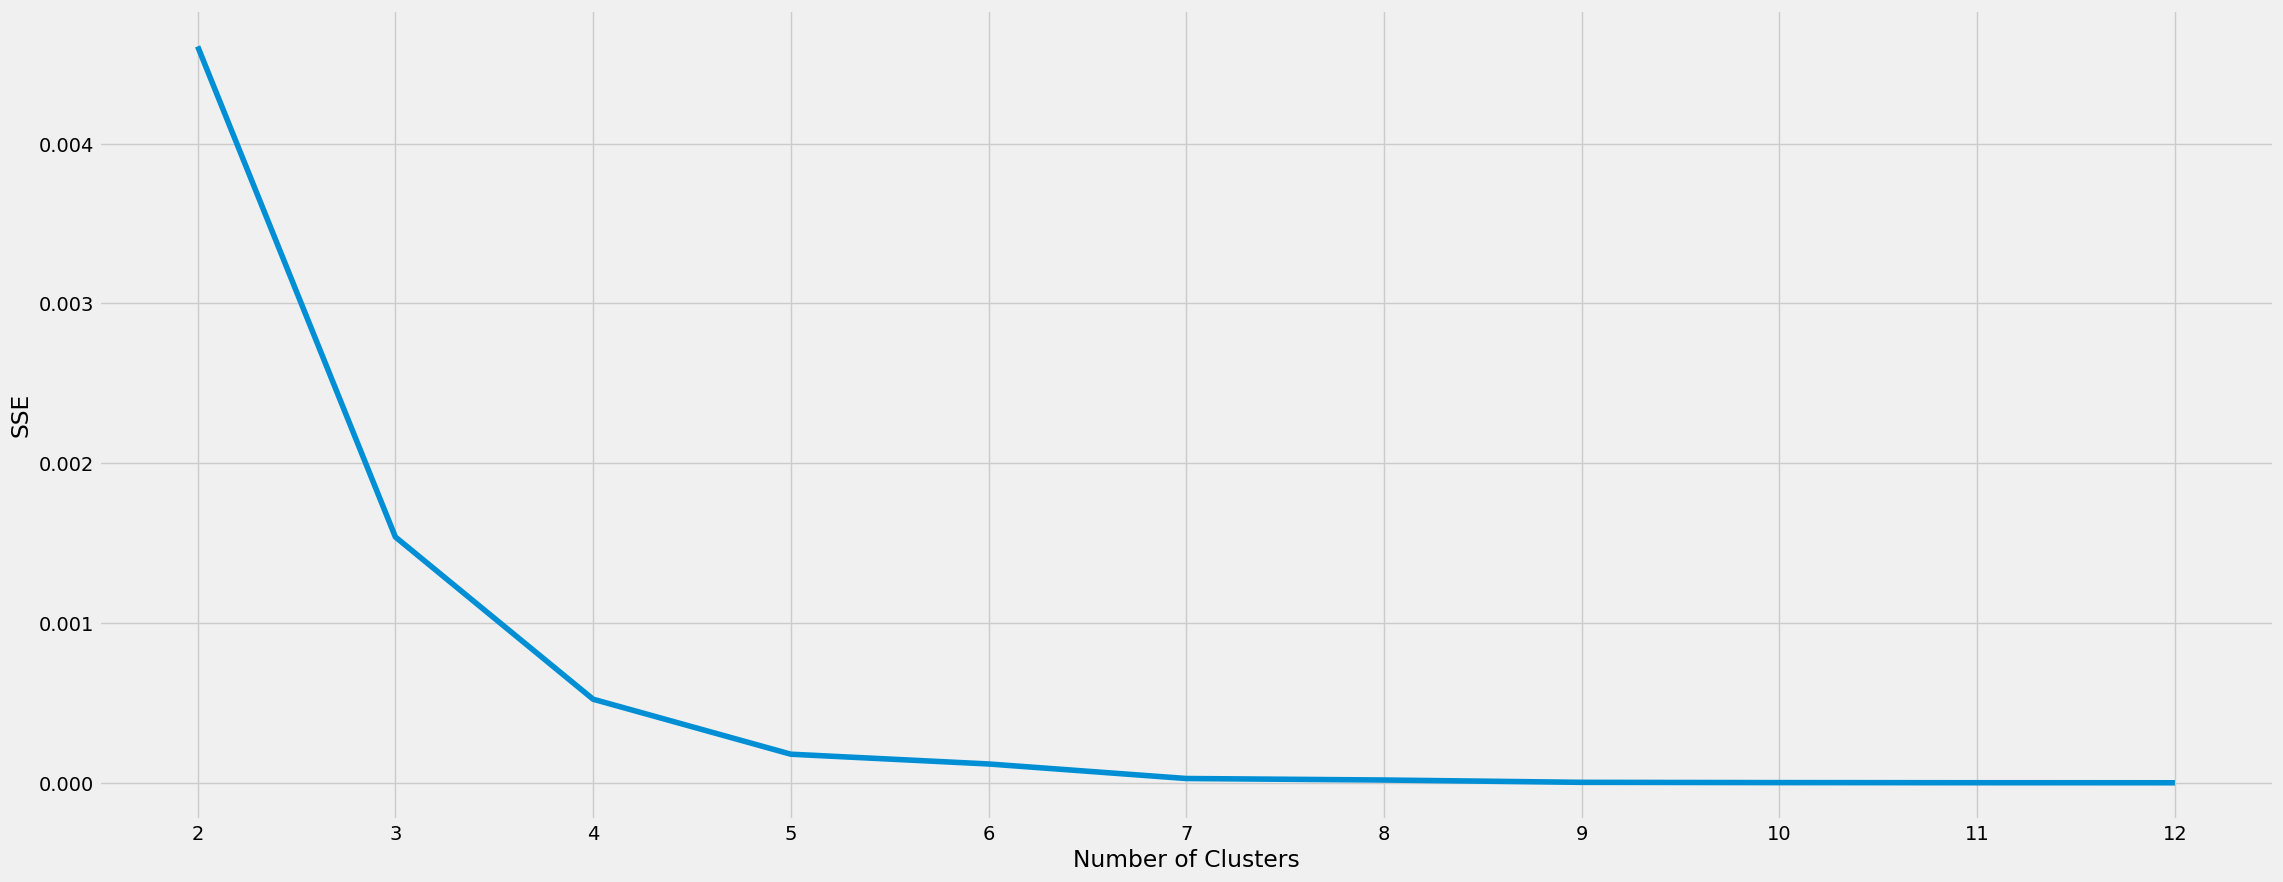

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 13), sse)
plt.xticks(range(2, 13))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

newdf_imputed = imputer.fit_transform(newdf)




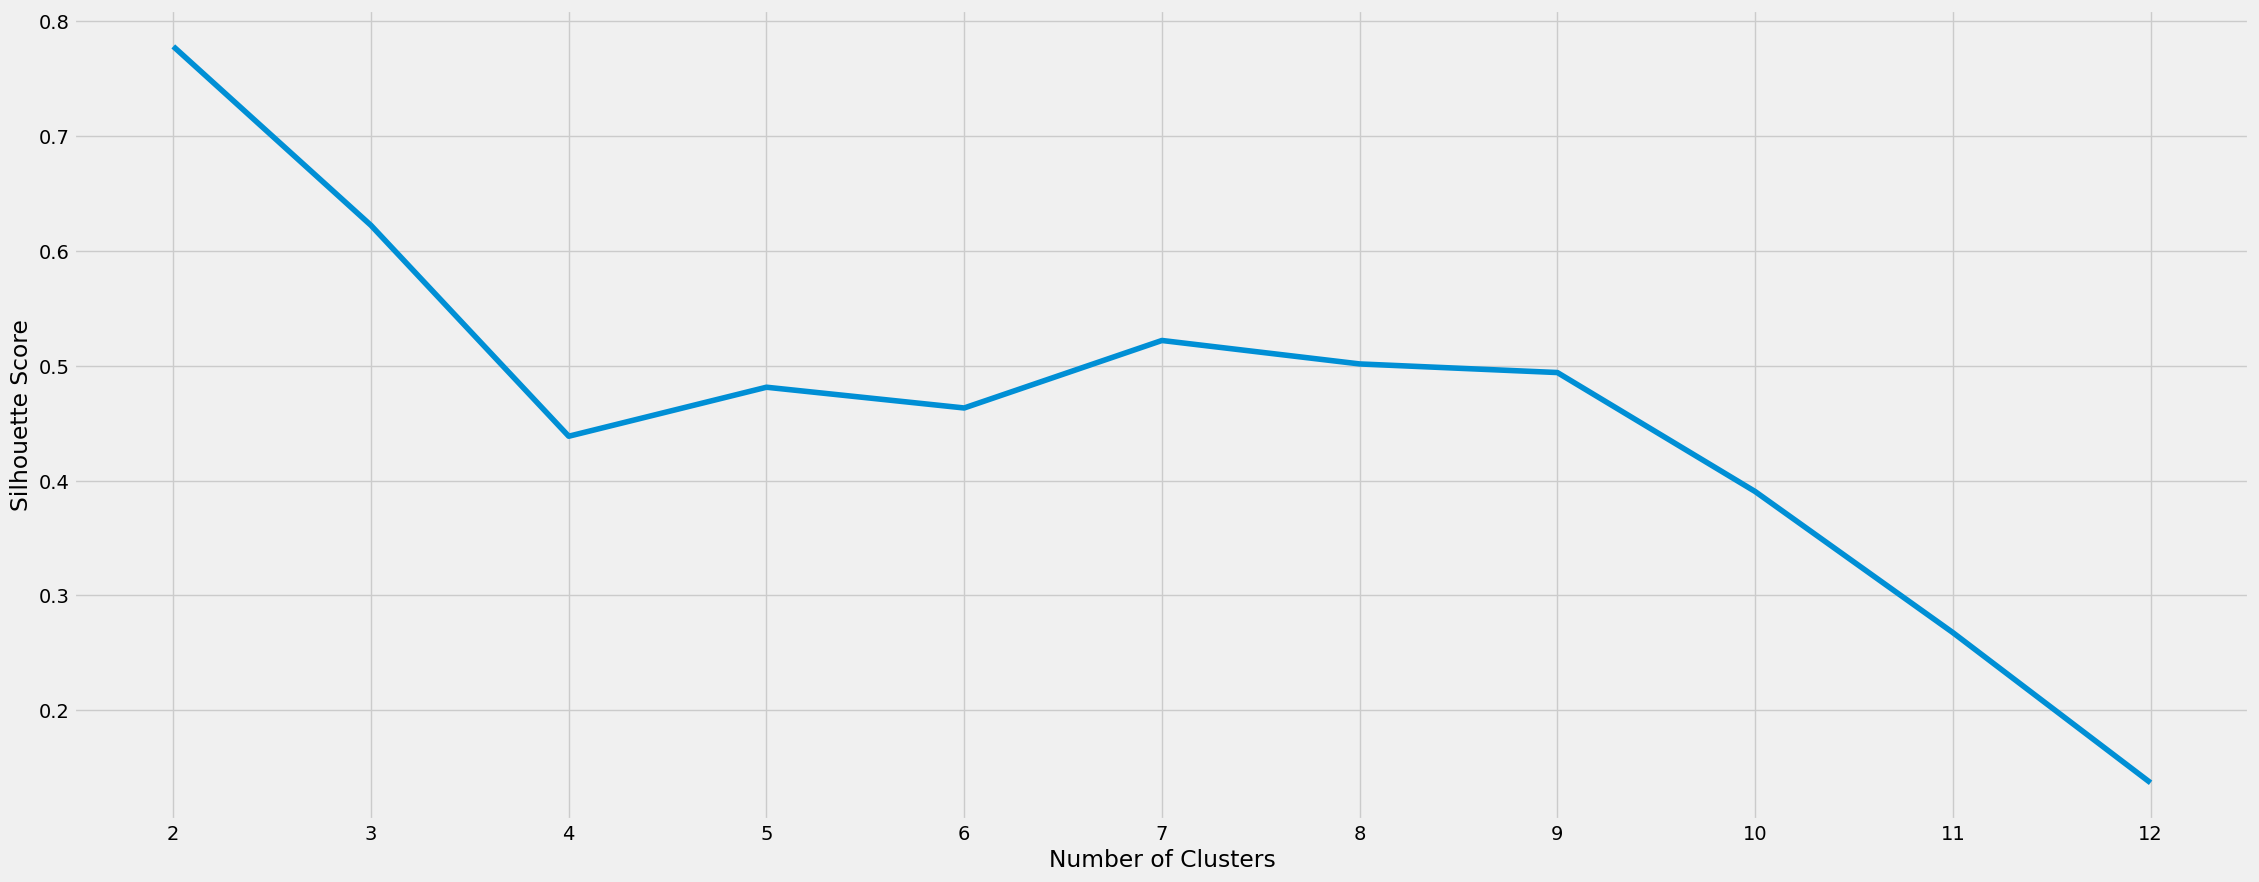

In [ ]:

from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

imputer = SimpleImputer(strategy='mean')

newdf_imputed = imputer.fit_transform(newdf)

sil = []

for k in range(2, 13):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(newdf_imputed)

    score = silhouette_score(newdf_imputed, kmeans.labels_)
    sil.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 13), sil)
plt.xticks(range(2, 13))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()



In [ ]:

from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(strategy='mean')
newdf_imputed = imputer.fit_transform(newdf)

kmeans = KMeans(n_clusters=2).fit(newdf_imputed)
identified_clusters = kmeans.labels_

identified_clusters

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [ ]:
newdf['clusternumber']=identified_clusters
newdf.head()

,EB,clusternumber
Time,,
2019-01-31,0.089534,1
2019-02-28,0.084510,1
2019-03-31,0.071170,0
2019-04-30,0.071582,0
2019-05-31,0.076354,0


In [ ]:
c1 = newdf[ newdf['clusternumber']==0]
c1

,EB,clusternumber
Time,,
2019-03-31,0.071170,0
2019-04-30,0.071582,0
2019-05-31,0.076354,0
2019-06-30,0.062036,0
2019-07-31,0.078176,0
2019-08-31,0.060798,0
2019-09-30,0.067624,0
2019-10-31,0.049737,0


In [ ]:
c2 = newdf[ newdf['clusternumber']==1]
c2

,EB,clusternumber
Time,,
2019-01-31,0.089534,1
2019-02-28,0.084510,1
2019-11-30,0.088837,1
2019-12-31,0.130636,1
2020-01-31,0.230000,1


In [ ]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(c1['EB'])
test_result


(0.8237572521659302,
 0.9920101354681967,
 2,
 5,
 {'1%': -6.045114, '5%': -3.9292800000000003, '10%': -2.98681},
 -32.86094933028379)

In [ ]:
import numpy as np
from statsmodels.tsa.stattools import adfuller

c2 = c2.replace([np.inf, -np.inf], np.nan)

c2 = c2.dropna()
test_result=adfuller(c2['EB'])
test_result

(3.0718921790725804,
 1.0,
 0,
 4,
 {'1%': -7.355440625, '5%': -4.474365000000001, '10%': -3.1269325},
 -17.17208270337299)

In [ ]:
c1

,EB,clusternumber
Time,,
2019-03-31,0.071170,0
2019-04-30,0.071582,0
2019-05-31,0.076354,0
2019-06-30,0.062036,0
2019-07-31,0.078176,0
2019-08-31,0.060798,0
2019-09-30,0.067624,0
2019-10-31,0.049737,0


In [ ]:
c1.columns

Index(['EB', 'clusternumber'], dtype='object')

In [ ]:
c1.pop('clusternumber')

Time
2019-03-31    0
2019-04-30    0
2019-05-31    0
2019-06-30    0
2019-07-31    0
2019-08-31    0
2019-09-30    0
2019-10-31    0
Freq: ME, Name: clusternumber, dtype: int32

In [ ]:
c2.pop('clusternumber')


Time
2019-01-31    1
2019-02-28    1
2019-11-30    1
2019-12-31    1
2020-01-31    1
Name: clusternumber, dtype: int32

In [ ]:
c1.head()

,EB
Time,
2019-03-31,0.071170
2019-04-30,0.071582
2019-05-31,0.076354
2019-06-30,0.062036
2019-07-31,0.078176


<Axes: xlabel='Time'>

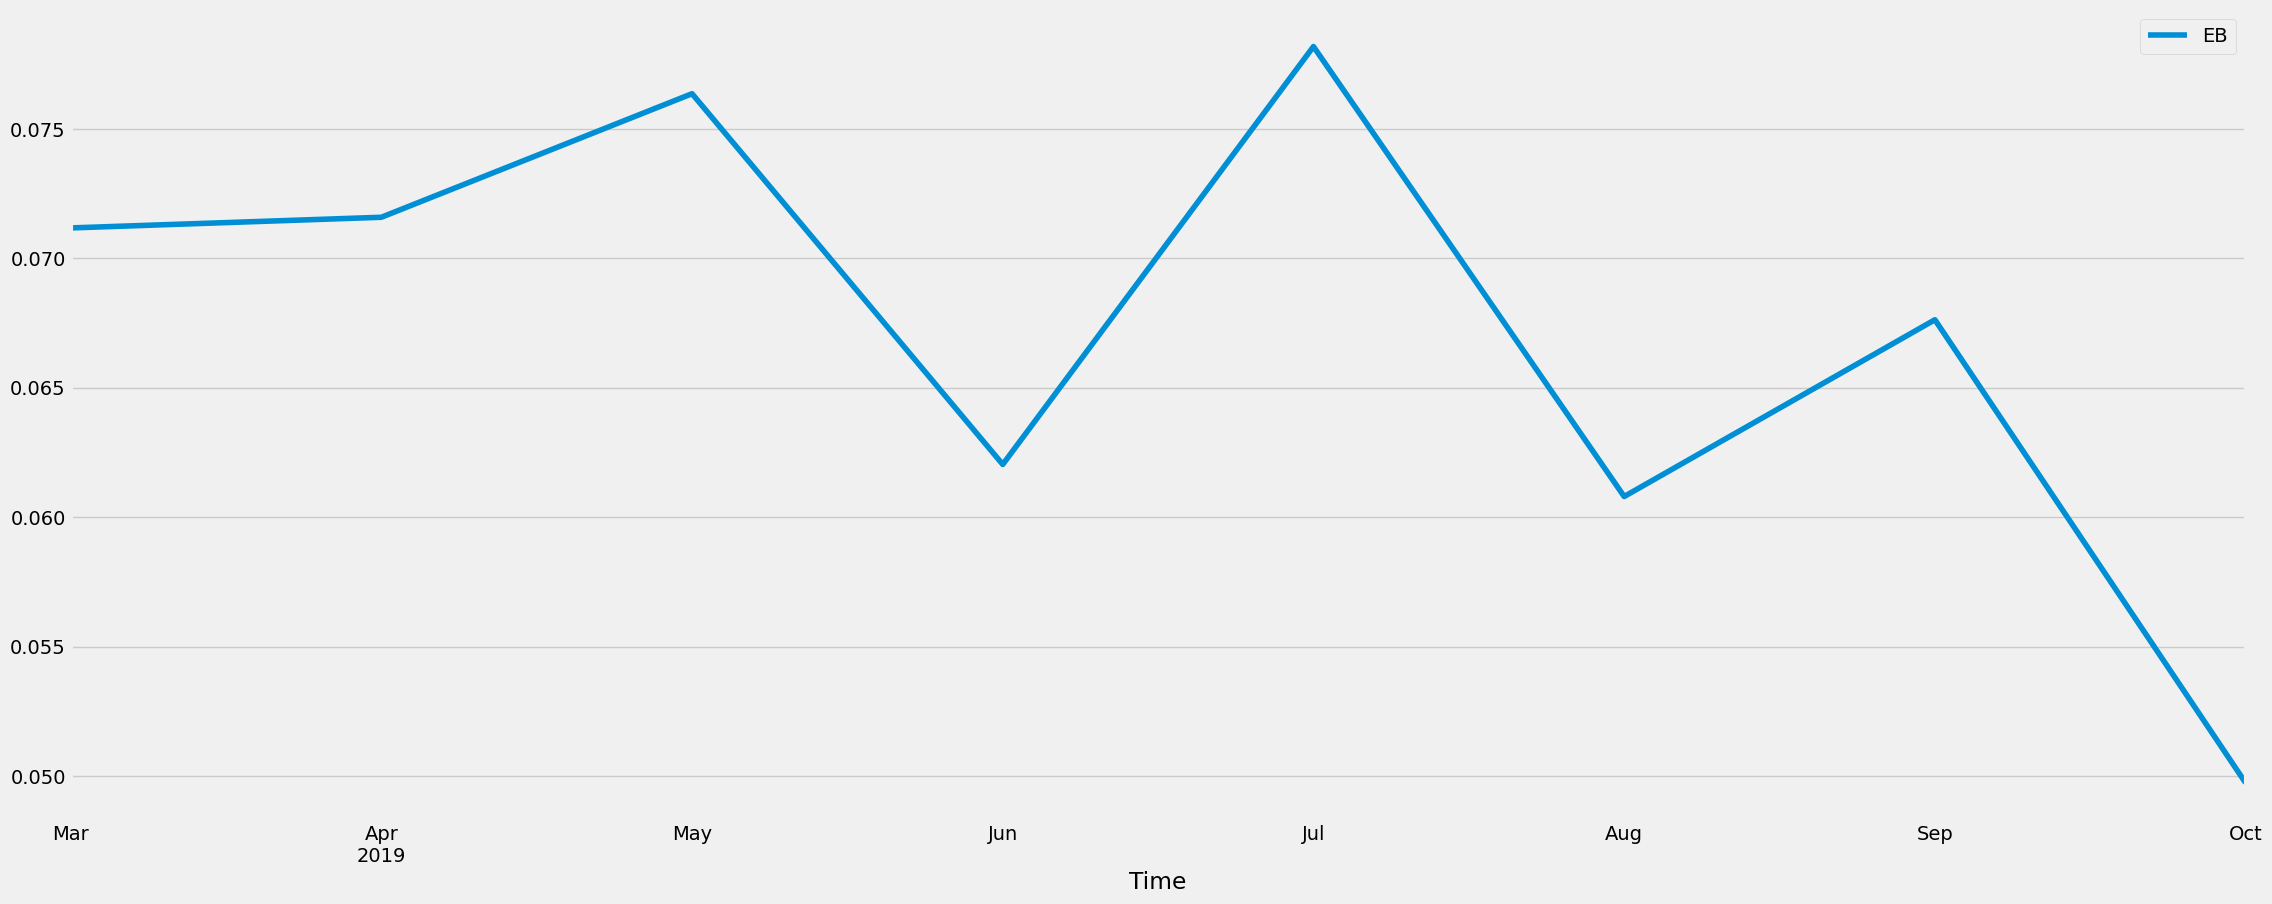

In [ ]:
c1.plot()

<Axes: xlabel='Time'>

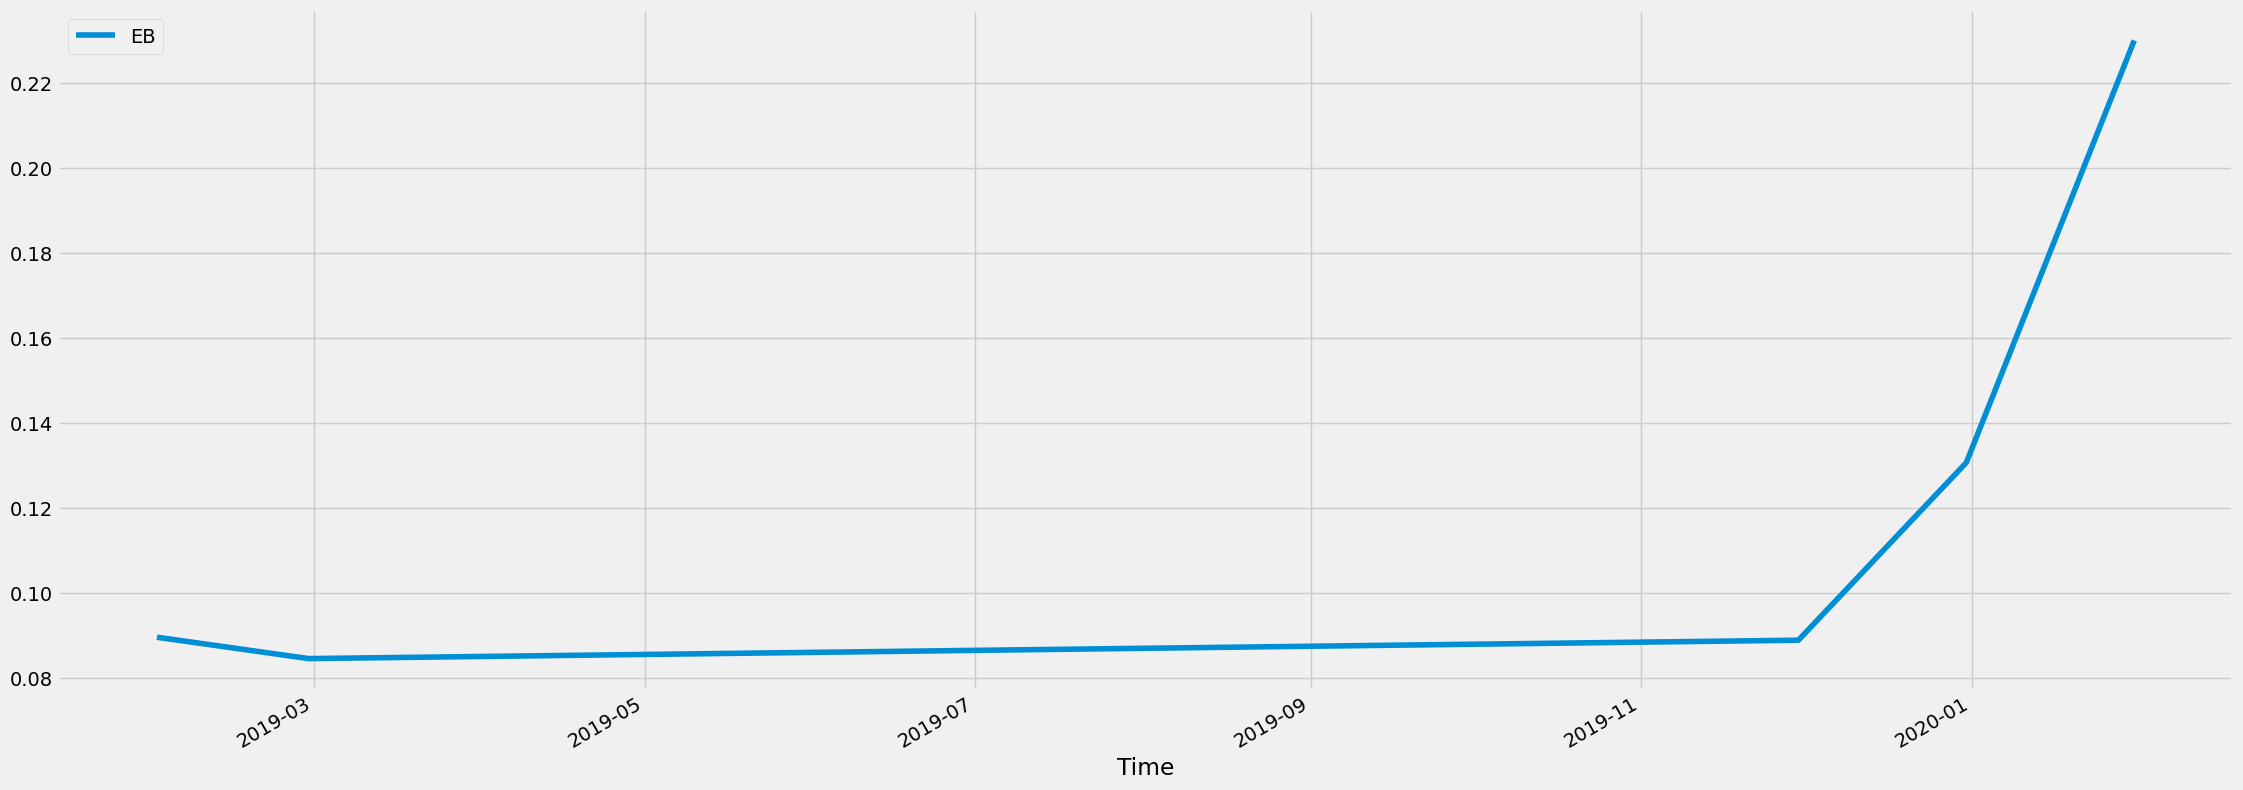

In [ ]:
c2.plot()

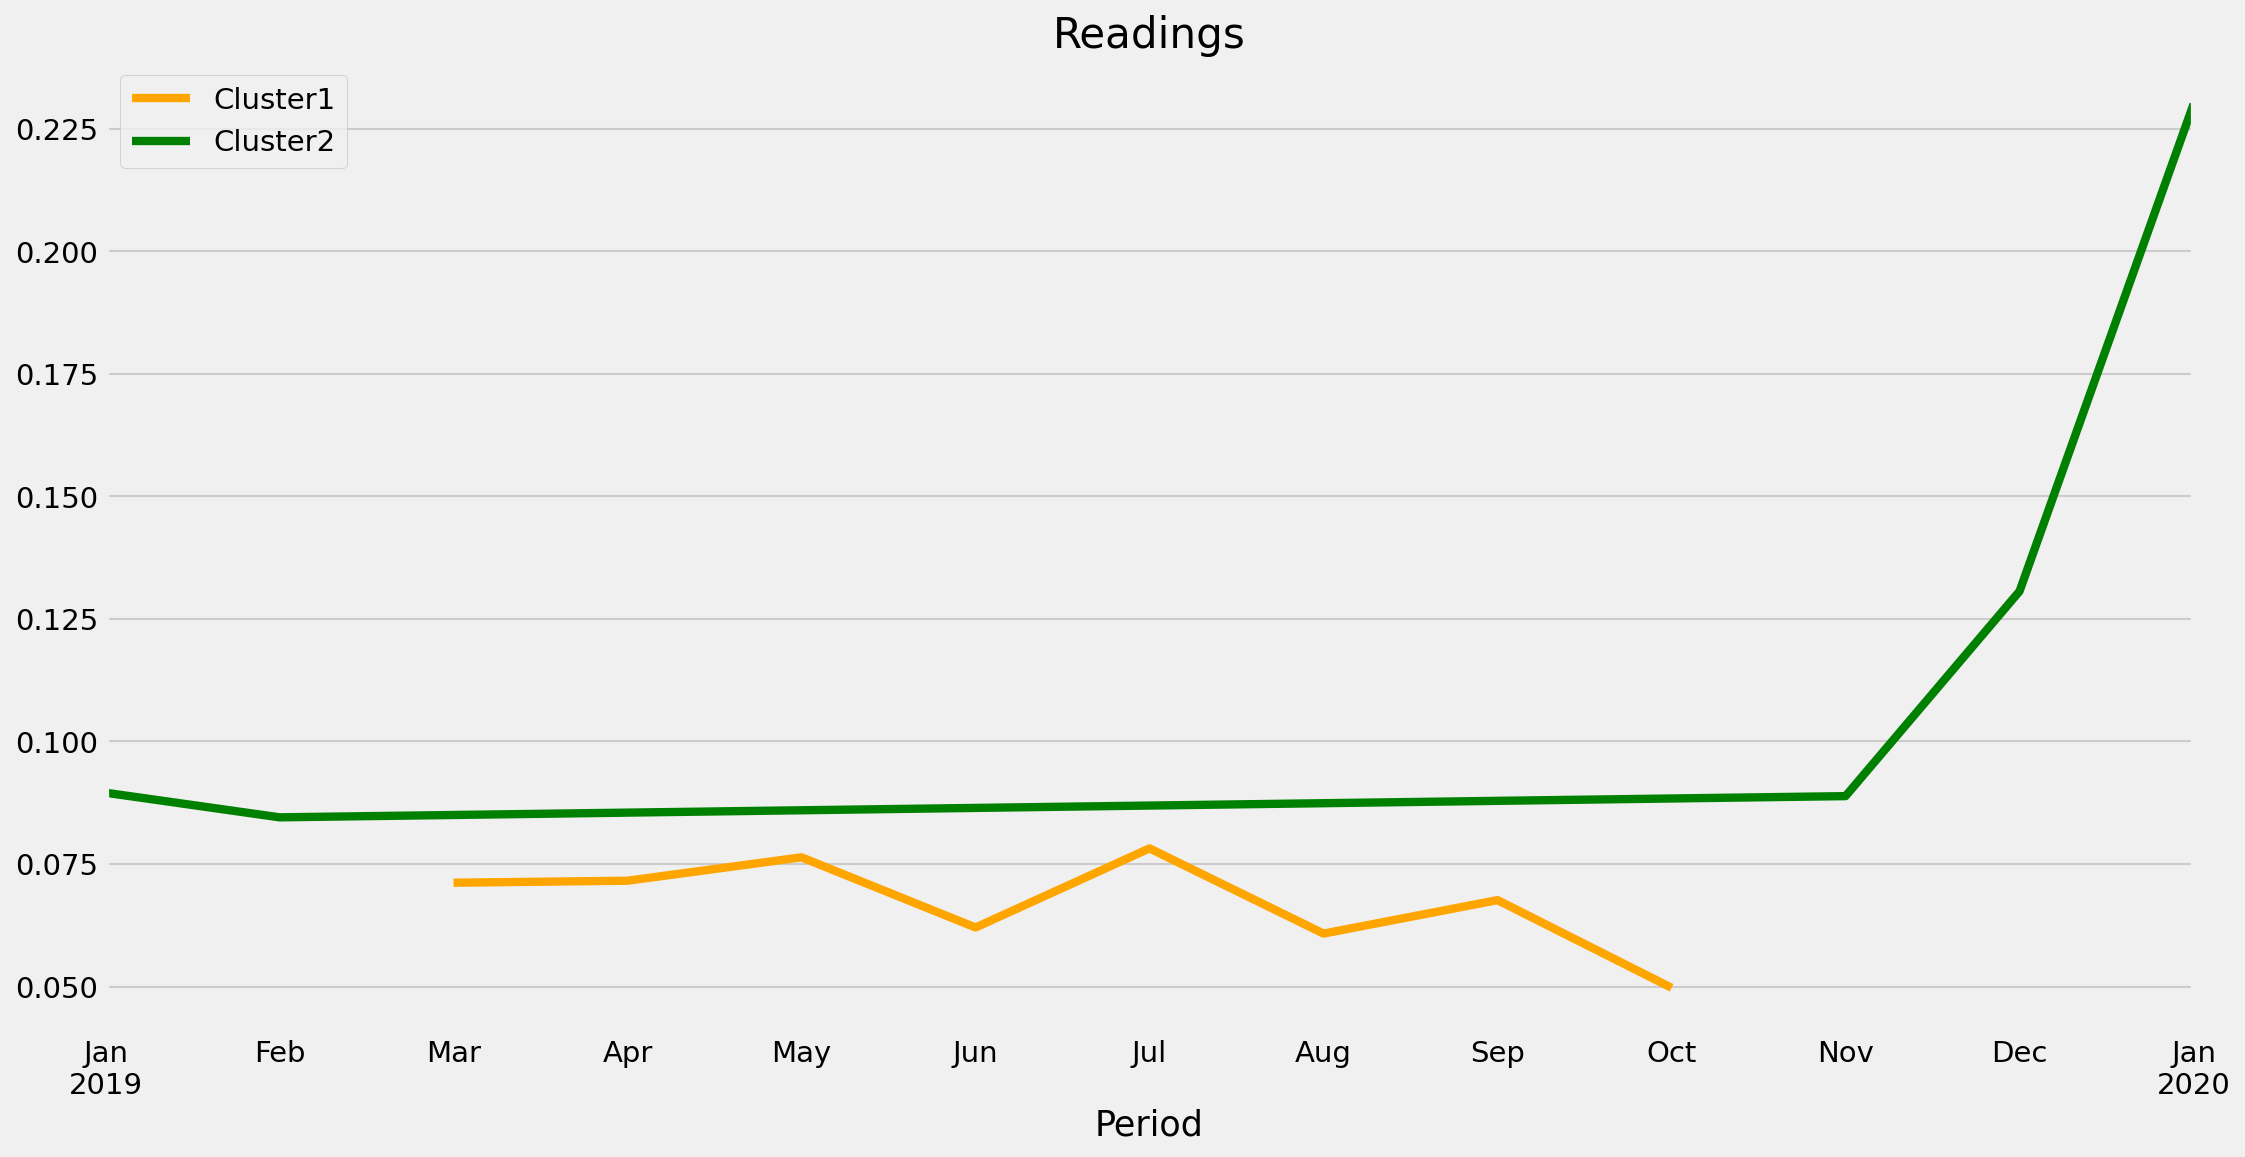

In [ ]:
plt.figure(figsize=(16, 8), dpi=150)

c1['EB'].plot(label='Cluster1', color='orange')
c2['EB'].plot(label='Cluster2', color='green')


plt.title('Readings')

plt.xlabel('Period')

plt.legend()


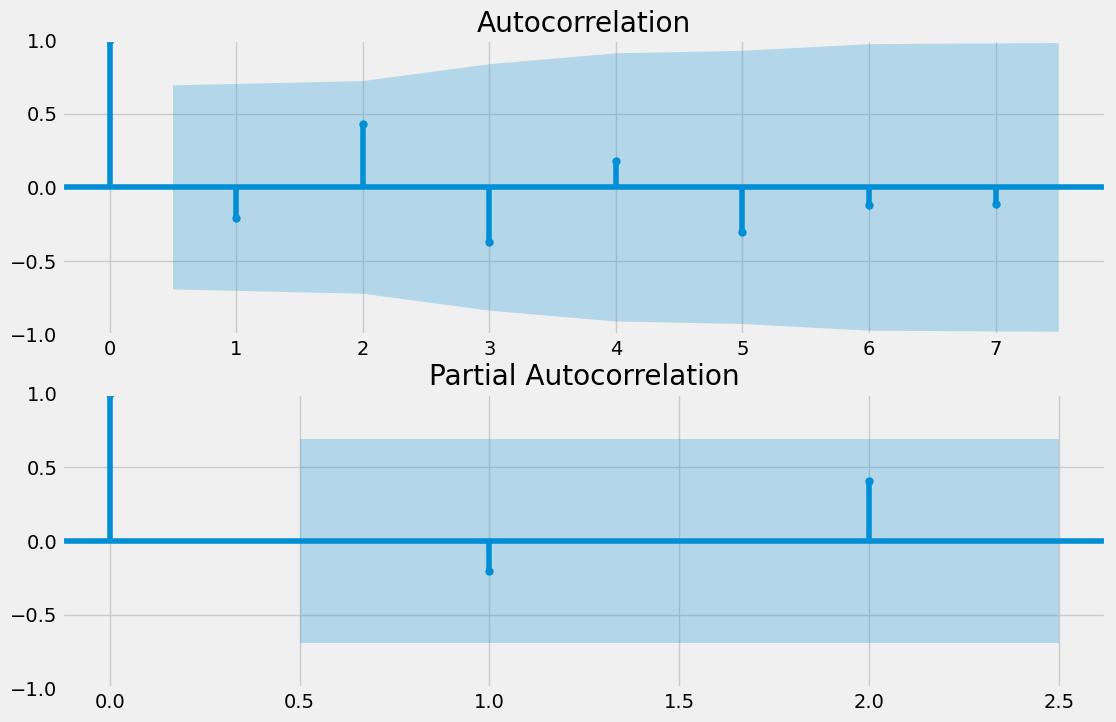

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
acf_data = c1['EB'].dropna()
num_lags_acf = min(100, len(acf_data) - 1)  # Ensure num_lags_acf is within the range of available data
fig = sm.graphics.tsa.plot_acf(acf_data, lags=num_lags_acf, ax=ax1)
ax2 = fig.add_subplot(212)
num_lags_pacf = min(2, len(acf_data) - 1)  # Set num_lags_pacf to be within the allowed range
fig = sm.graphics.tsa.plot_pacf(acf_data, lags=num_lags_pacf, ax=ax2)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(c1['EB'],order=(6,0,5))
model_fit=model.fit()
model_fit.summary()


C:\Users\shera\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\shera\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     EB   No. Observations:                    8
Model:                 ARIMA(6, 0, 5)   Log Likelihood                  31.237
Date:                Mon, 01 Apr 2024   AIC                            -36.474
Time:                        18:46:51   BIC                            -35.441
Sample:                    03-31-2019   HQIC                           -43.440
                         - 10-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0663      0.010      6.557      0.000       0.046       0.086
ar.L1         -0.2375      5.171     -0.046      0.963     -10.372       9.897
ar.L2          0.1535     10.924      0.014      0.989     -21.258      21.565
ar.L3         -0.2132      4.000     -0.053      0.957      -8.052       7.626
ar.L4          0.2343      4.372      0.054      0.957      -8.334       8.803
ar.L5         -0.6180      2.110     -0.293      0.770      -4.753       3.517
ar.L6         -0.5939      4.539     -0.131      0.896      -9.491       8.303
ma.L1         -0.2581     57.756     -0.004      0.996    -113.459     112.943
ma.L2         -0.0002     32.265  -6.25e-06      1.000     -63.238      63.237
ma.L3         -0.0461     23.754     -0.002      0.998     -46.603      46.511
ma.L4          0.3336     24.235      0.014      0.989     -47.166      47.833
ma.L5         -0.6334      6.540     -0.097      0.923     -13.451      12.185
sigma2      4.557e-06   6.11e-05      0.075      0.941      -0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.50   Jarque-Bera (JB):                 0.67
Prob(Q):                              0.48   Prob(JB):                         0.72
Heteroskedasticity (H):               0.24   Skew:                             0.03
Prob(H) (two-sided):                  0.27   Kurtosis:                         1.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.09e+18. Standard errors may be unstable.
"""

C:\Users\shera\AppData\Local\Temp\ipykernel_10972\3798141332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c1['forecast']=model_fit.predict(dynamic=False)


<Axes: xlabel='Time'>

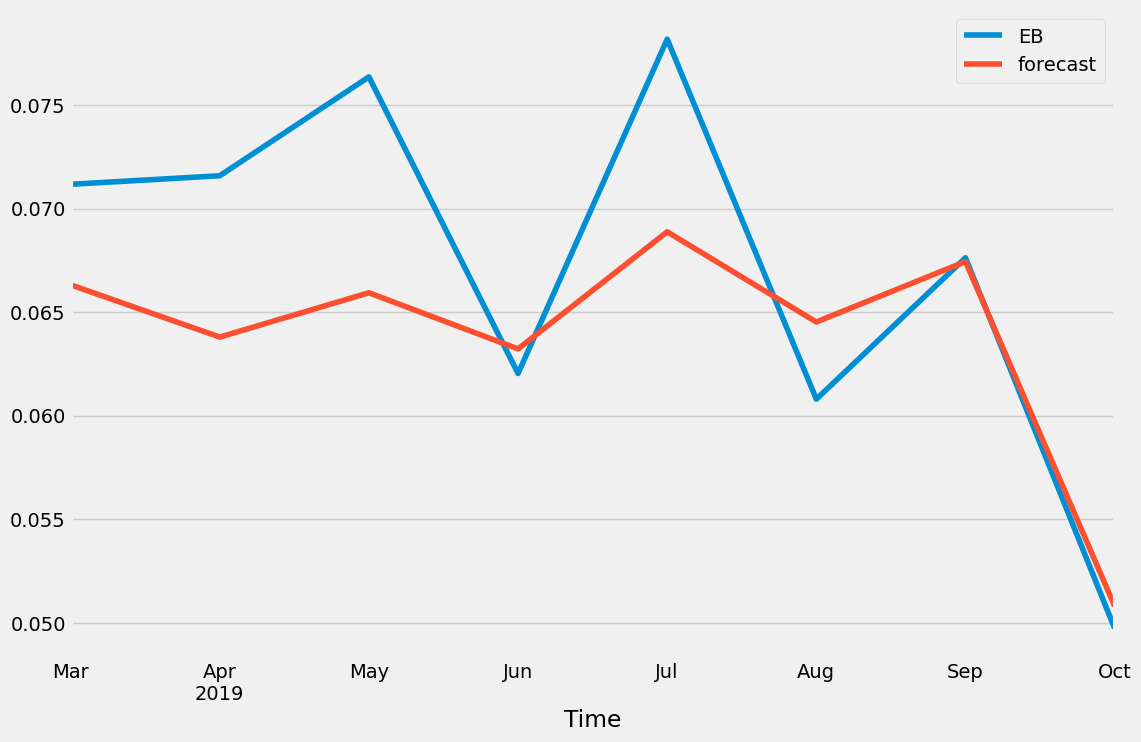

In [ ]:
c1['forecast']=model_fit.predict(dynamic=False)
c1[['EB','forecast']].plot(figsize=(12,8))

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms=sqrt(mean_squared_error(c1['EB'],c1['forecast']))
print (rms)

0.006079729778771518


In [ ]:
c1


,EB,forecast
Time,,
2019-03-31,0.071170,0.066317
2019-04-30,0.071582,0.063795
2019-05-31,0.076354,0.065935
2019-06-30,0.062036,0.063223
2019-07-31,0.078176,0.068877
2019-08-31,0.060798,0.064522
2019-09-30,0.067624,0.067441
2019-10-31,0.049737,0.050811


In [ ]:
c1.pop('forecast')

Time
2019-03-31    0.066317
2019-04-30    0.063795
2019-05-31    0.065935
2019-06-30    0.063223
2019-07-31    0.068877
2019-08-31    0.064522
2019-09-30    0.067441
2019-10-31    0.050811
Freq: ME, Name: forecast, dtype: float64

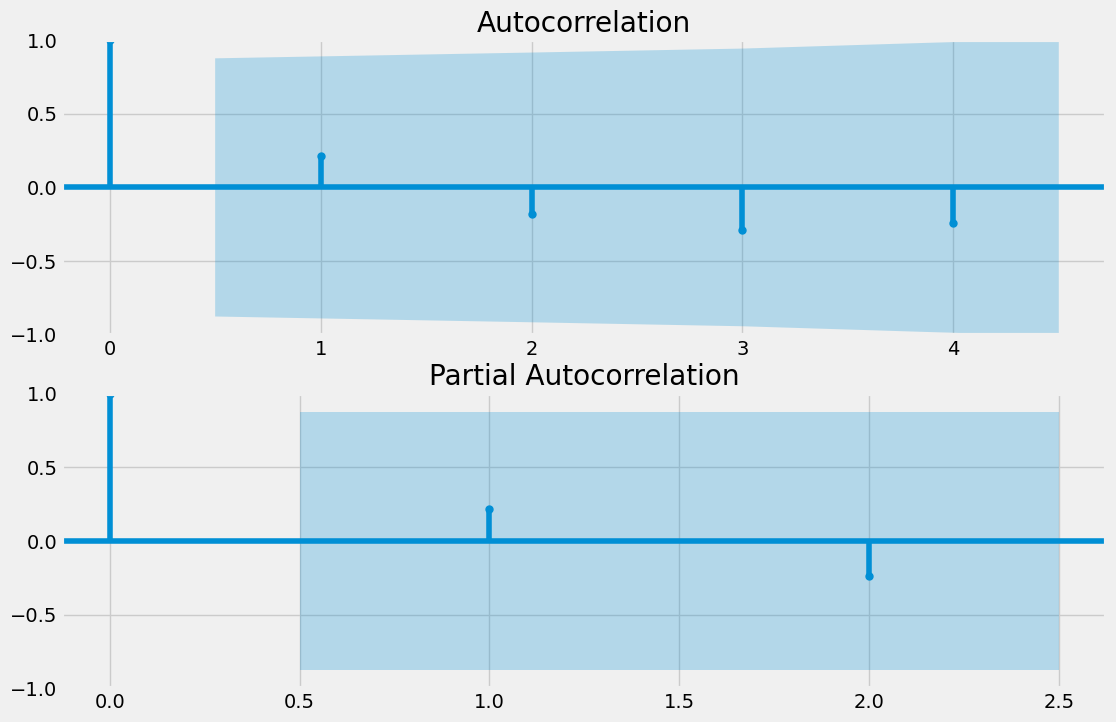

In [ ]:


fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
acf_data = c2['EB'].dropna()
num_lags_acf = min(100, len(acf_data) - 1)  # Ensure num_lags_acf is within the range of available data
fig = sm.graphics.tsa.plot_acf(acf_data, lags=num_lags_acf, ax=ax1)
ax2 = fig.add_subplot(212)
num_lags_pacf = min(2, len(acf_data) - 1)  # Set num_lags_pacf to be within the allowed range
fig = sm.graphics.tsa.plot_pacf(acf_data, lags=num_lags_pacf, ax=ax2)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model2=ARIMA(c2['EB'],order=(6,0,5))
model_fit2=model2.fit()
model_fit2.summary()


C:\Users\shera\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shera\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shera\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shera\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations t

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     EB   No. Observations:                    5
Model:                 ARIMA(6, 0, 5)   Log Likelihood                  12.947
Date:                Mon, 01 Apr 2024   AIC                              0.105
Time:                        18:56:29   BIC                             -4.972
Sample:                             0   HQIC                           -13.522
                                  - 5                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1716      0.101      1.696      0.090      -0.027       0.370
ar.L1         -0.1275      0.164     -0.777      0.437      -0.449       0.194
ar.L2         -0.4224      1.147     -0.368      0.713      -2.670       1.825
ar.L3         -0.4370      1.040     -0.420      0.674      -2.476       1.602
ar.L4         -0.1054      0.723     -0.146      0.884      -1.523       1.312
ar.L5         -0.7042      0.474     -1.484      0.138      -1.634       0.226
ar.L6         -0.5527      0.429     -1.290      0.197      -1.393       0.287
ma.L1          1.1795      0.001   1512.599      0.000       1.178       1.181
ma.L2         -1.3341      0.000  -2674.390      0.000      -1.335      -1.333
ma.L3         -1.7831   9.46e-05  -1.88e+04      0.000      -1.783      -1.783
ma.L4          0.3371      0.000    936.922      0.000       0.336       0.338
ma.L5          0.6045      0.001    492.147      0.000       0.602       0.607
sigma2      2.624e-07   2.05e-06      0.128      0.898   -3.75e-06    4.27e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):                 0.51
Prob(Q):                              0.52   Prob(JB):                         0.77
Heteroskedasticity (H):               0.20   Skew:                            -0.72
Prob(H) (two-sided):                  0.33   Kurtosis:                         2.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.84e+24. Standard errors may be unstable.
"""

In [ ]:

!pip install pmdarima


You should consider upgrading via the 'C:\Users\shera\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [ ]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train, test = train_test_split(c1['EB'], train_size=0.8)


<Axes: >

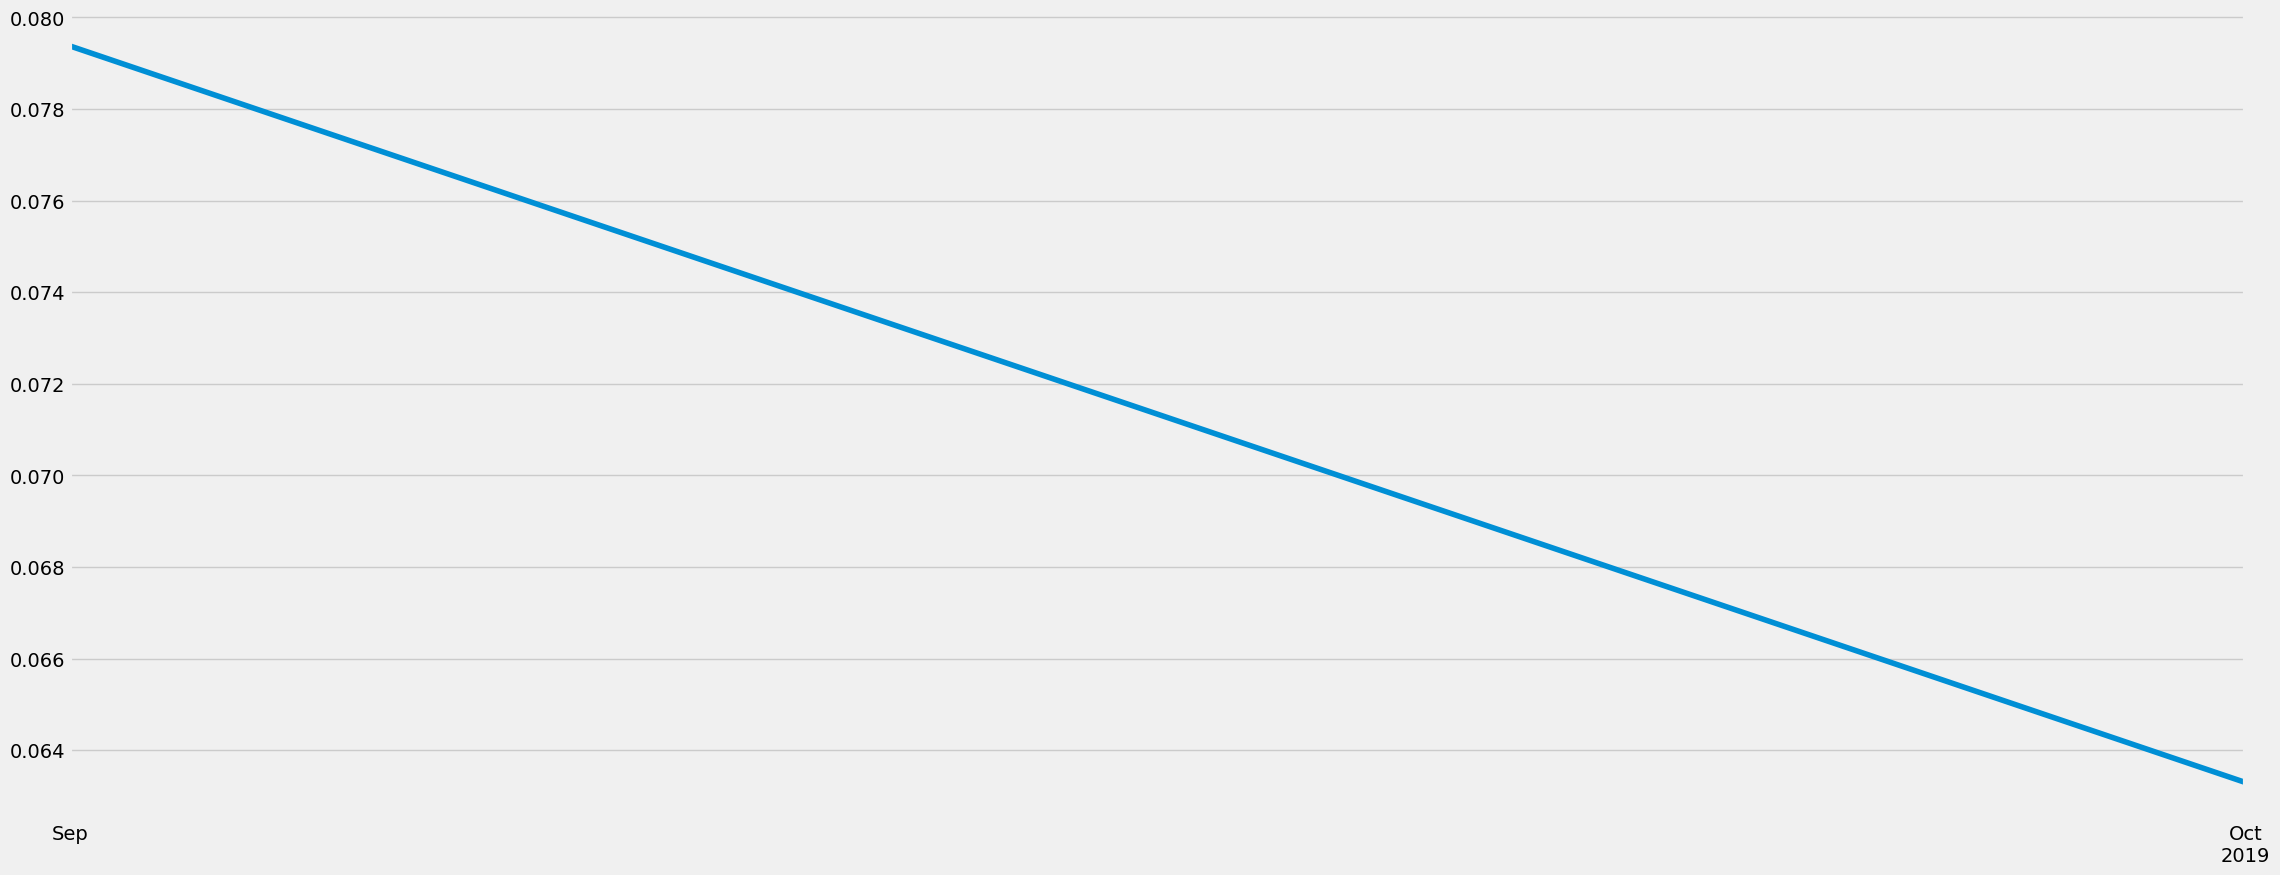

In [ ]:
automodel = pm.auto_arima(train, seasonal=False)
preds = automodel.predict(test.shape[0])

preds.plot()

In [ ]:
automodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    6
Model:               SARIMAX(1, 0, 0)   Log Likelihood                  24.922
Date:                Mon, 01 Apr 2024   AIC                            -43.843
Time:                        19:00:03   BIC                            -44.468
Sample:                    03-31-2019   HQIC                           -46.344
                         - 08-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1320      0.026      5.134      0.000       0.082       0.182
ar.L1         -0.8655      0.337     -2.568      0.010      -1.526      -0.205
sigma2      1.144e-05    1.2e-05      0.951      0.342   -1.21e-05     3.5e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.51   Jarque-Bera (JB):                 0.46
Prob(Q):                              0.47   Prob(JB):                         0.80
Heteroskedasticity (H):               8.62   Skew:                             0.62
Prob(H) (two-sided):                  0.21   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""